In [1]:
import os
import pandas as pd
import numpy as np

In [47]:
import matplotlib.pyplot as plt                                 # For plotting
from sklearn.neighbors import KNeighborsClassifier              # kNN classifier
from sklearn.neighbors import KNeighborsRegressor               # kNN regressor
from sklearn.model_selection import GridSearchCV                # Grid search with CV
from sklearn.metrics import confusion_matrix,mean_squared_error # Error Metrics
from sklearn.preprocessing import MinMaxScaler                  # To Scale the data
from sklearn.model_selection import train_test_split            # To split the data
from sklearn.metrics import accuracy_score



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
  
    
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
from sklearn.neighbors import KNeighborsClassifier    



C:\Users\SivaKumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df=pd.read_csv('train.csv')
dft=pd.read_csv('test.csv')

In [4]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [5]:
df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [6]:
dft.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [7]:
dft.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,41.825224,12.946400,6.574800,65.368058,0.376197,79.993068,3.853600,32383.134179,1.990800,0.250886,6186.283200
std,16.280187,3.523364,7.179542,11.442005,0.116960,2.713833,1.877652,9485.096436,1.018592,0.387663,3602.235035
min,0.000000,1.000000,0.000000,20.966272,0.143376,74.740000,1.000000,831.695553,0.000000,0.000368,1.000000
25%,30.593607,11.000000,1.000000,57.702826,0.292583,77.930000,2.000000,26008.851717,1.000000,0.013136,3071.750000
50%,41.461187,13.000000,4.000000,66.066545,0.357404,79.600000,4.000000,32472.865497,2.000000,0.072466,6159.500000
75%,52.751142,15.000000,9.000000,73.119872,0.441699,81.530000,5.000000,38759.519071,3.000000,0.315407,9309.250000
max,100.000000,23.000000,54.000000,97.994531,0.881926,94.200000,7.000000,62315.408444,5.000000,2.365378,12493.000000


In [8]:
df.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [9]:
df.shape,dft.shape

((10000, 12), (2500, 11))

In [10]:
df.Severity.value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [12]:
df['Severity']=df['Severity'].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null category
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: category(1), float64(6), int64(5)
memory usage: 869.5 KB


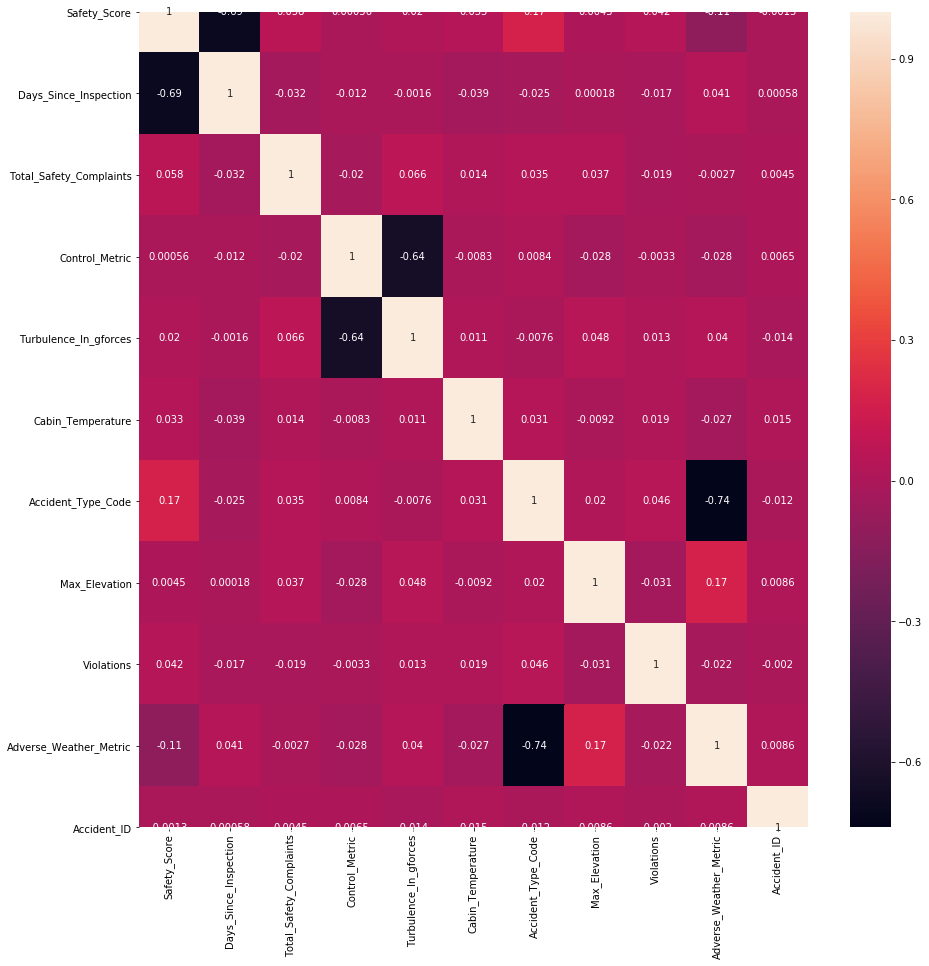

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [15]:
#df['Severity']=df['Severity'].cat.codes

In [16]:
df.Severity.dtypes

CategoricalDtype(categories=['Highly_Fatal_And_Damaging', 'Minor_Damage_And_Injuries',
                  'Significant_Damage_And_Fatalities',
                  'Significant_Damage_And_Serious_Injuries'],
                 ordered=False)

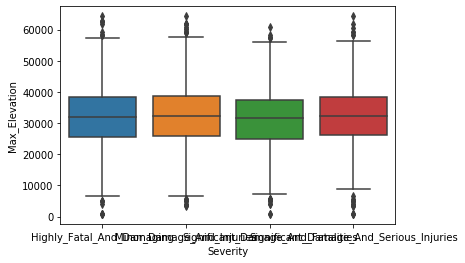

In [17]:
sns.boxplot(df.Severity,df.Max_Elevation,orient='v')

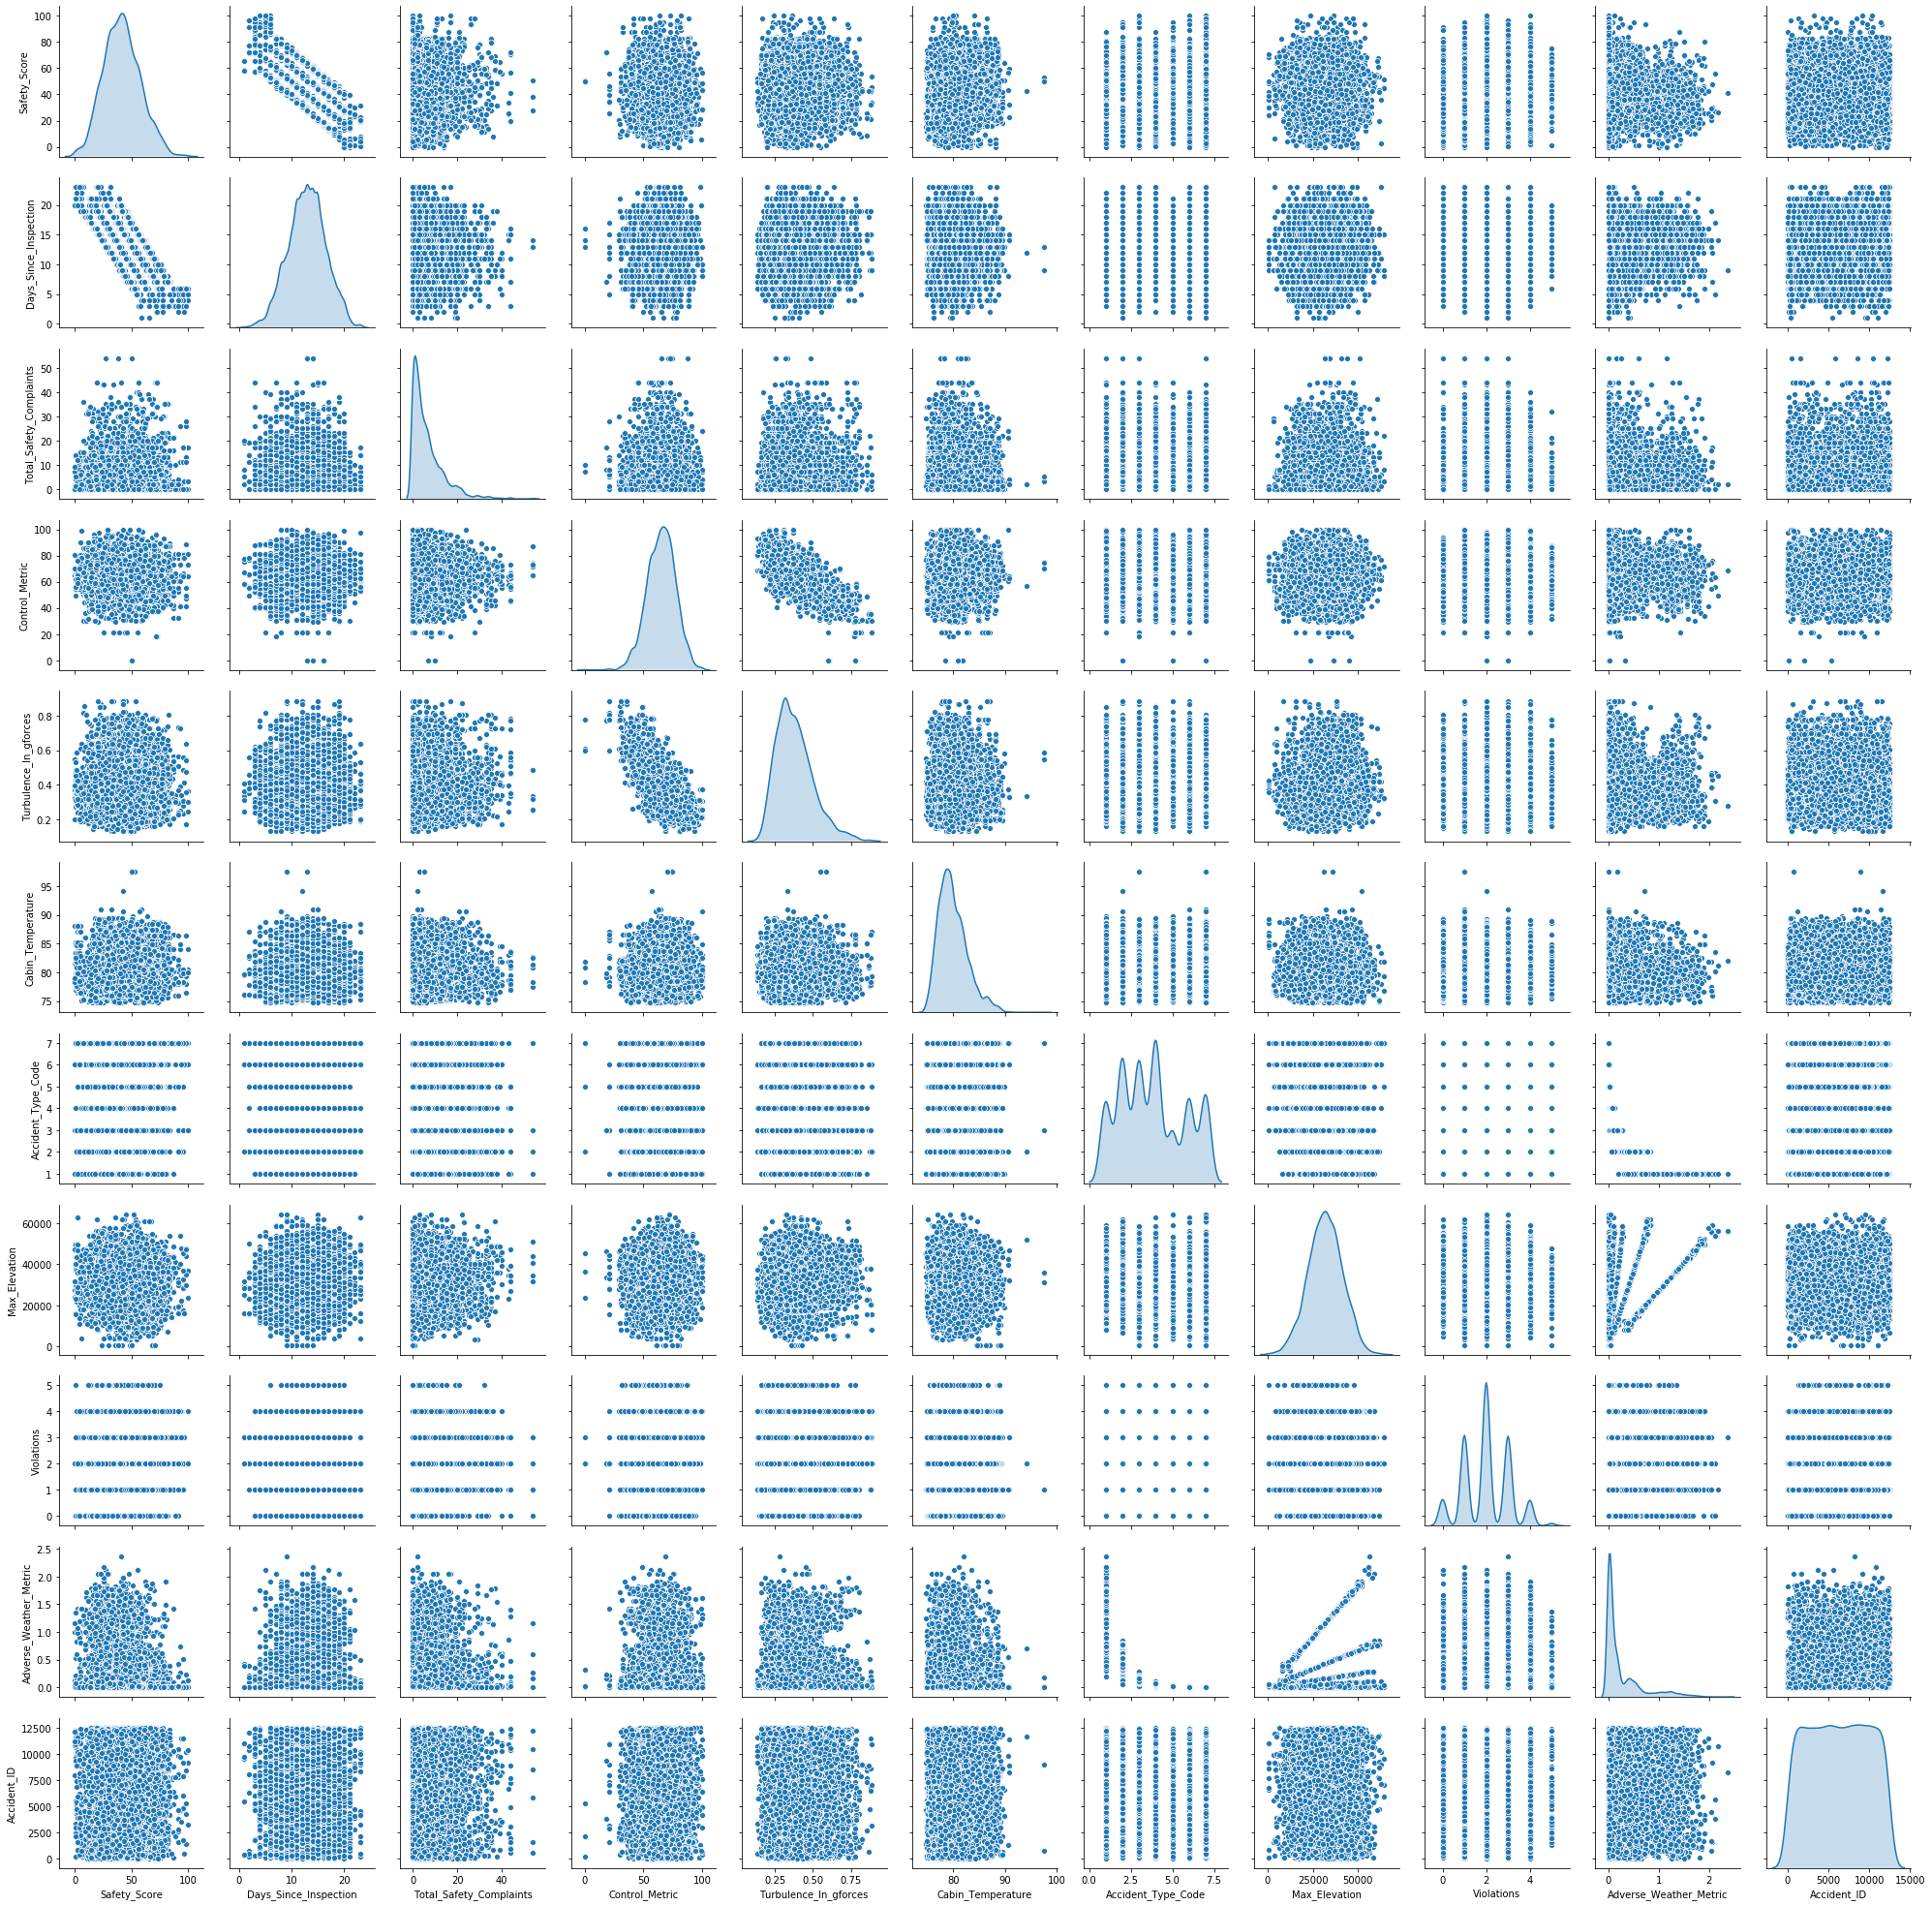

In [18]:
sns.pairplot(df,diag_kind='kde')

In [19]:
df.corr()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Safety_Score,1.000000,-0.685386,0.057726,0.000564,0.019603,0.032747,0.173930,0.004451,0.041735,-0.107925,-0.001334
Days_Since_Inspection,-0.685386,1.000000,-0.032055,-0.011963,-0.001564,-0.039140,-0.024718,0.000183,-0.016724,0.040804,0.000582
Total_Safety_Complaints,0.057726,-0.032055,1.000000,-0.019665,0.066412,0.013590,0.034927,0.036855,-0.019005,-0.002713,0.004527
Control_Metric,0.000564,-0.011963,-0.019665,1.000000,-0.643285,-0.008330,0.008385,-0.028375,-0.003284,-0.028296,0.006481
Turbulence_In_gforces,0.019603,-0.001564,0.066412,-0.643285,1.000000,0.010757,-0.007565,0.047625,0.013171,0.039802,-0.014396
Cabin_Temperature,0.032747,-0.039140,0.013590,-0.008330,0.010757,1.000000,0.030682,-0.009186,0.018619,-0.026647,0.014865
Accident_Type_Code,0.173930,-0.024718,0.034927,0.008385,-0.007565,0.030682,1.000000,0.019970,0.046379,-0.739361,-0.012278
Max_Elevation,0.004451,0.000183,0.036855,-0.028375,0.047625,-0.009186,0.019970,1.000000,-0.030513,0.173436,0.008576
Violations,0.041735,-0.016724,-0.019005,-0.003284,0.013171,0.018619,0.046379,-0.030513,1.000000,-0.021578,-0.002047
Adverse_Weather_Metric,-0.107925,0.040804,-0.002713,-0.028296,0.039802,-0.026647,-0.739361,0.173436,-0.021578,1.000000,0.008586


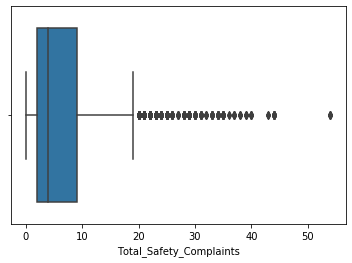

In [20]:
sns.boxplot(df.Total_Safety_Complaints)

In [21]:
l1=df['Total_Safety_Complaints'].quantile(0.99)

In [22]:
l1

33.0

In [23]:
df['Total_Safety_Complaints'][df['Total_Safety_Complaints']>=33]=33

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df[(df.Safety_Score>=41.87)&(df.Severity==3)].shape

(0, 12)

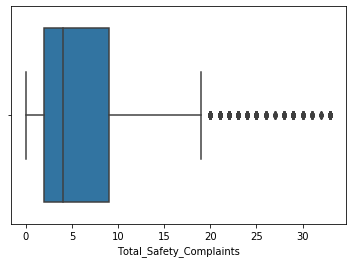

In [25]:
sns.boxplot(df.Total_Safety_Complaints)

In [26]:
df.drop(['Accident_ID'],axis=1,inplace=True)

In [27]:
df.Severity.value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [28]:
df['Severity']=df['Severity'].replace('Minor_Damage_And_Injuries',0)
df['Severity']=df['Severity'].replace('Significant_Damage_And_Serious_Injuries',1)
df['Severity']=df['Severity'].replace('Significant_Damage_And_Fatalities',2)
df['Severity']=df['Severity'].replace('Highly_Fatal_And_Damaging',3)

In [29]:
df.Severity.value_counts()

3    3049
1    2729
0    2527
2    1695
Name: Severity, dtype: int64

In [30]:
#enc=OrdinalEncoder()

In [31]:
#x=[['Minor_Damage_And_Injuries',0],['Significant_Damage_And_Serious_Injuries',1],['Significant_Damage_And_Fatalities',2],['Highly_Fatal_And_Damaging',3]]

In [32]:
#enc.fit_transform(df.Severity([['Minor_Damage_And_Injuries'],['Significant_Damage_And_Serious_Injuries'],['Significant_Damage_And_Fatalities'],['Highly_Fatal_And_Damaging']])).reshape((0,3))

In [33]:
#df['Severity']=enc.fit()

In [34]:
df.shape

(10000, 11)

In [37]:
for io in df:
    df[io]=df[io].astype('category')

In [38]:
x=df.iloc[:,1:]

In [39]:
y=df.iloc[:,:1]

In [40]:
x.shape,y.shape

((10000, 10), (10000, 1))

In [41]:
x.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric'],
      dtype='object')

In [42]:
y.columns

Index(['Severity'], dtype='object')

In [43]:
y.dtypes

Severity    category
dtype: object

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1212)

In [48]:
mnb=MultinomialNB()

In [49]:
gnb=GaussianNB()

In [50]:
model=mnb.fit(x_train,y_train)

C:\Users\SivaKumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
model_gnb=gnb.fit(x_train,y_train)

C:\Users\SivaKumar\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
y_pred_train_mnb=mnb.predict(x_train)

In [53]:
y_pred_train_gnb=gnb.predict(x_train)

In [54]:
y_pred_test_mnb=mnb.predict(x_test)

In [55]:
y_pred_test_gnb=gnb.predict(x_test)

In [56]:
con_matrix_mnb_train=confusion_matrix(y_train,y_pred_train_mnb)
con_matrix_mnb_train

array([[ 811,  223,  412,  568],
       [ 315,  606,  415,  870],
       [ 236,  110,  523,  489],
       [ 281,  393,  238, 1510]], dtype=int64)

In [57]:
con_matrix_gnb_train=confusion_matrix(y_train,y_pred_train_gnb)
con_matrix_gnb_train

array([[ 972,  575,  106,  361],
       [ 246, 1215,  188,  557],
       [ 221,  482,  262,  393],
       [ 346,  761,   61, 1254]], dtype=int64)

In [58]:
con_matrix_mnb_test=confusion_matrix(y_test,y_pred_test_mnb)
con_matrix_mnb_test

array([[182,  72, 105, 154],
       [ 85, 125, 105, 208],
       [ 47,  40, 121, 129],
       [ 85,  94,  61, 387]], dtype=int64)

In [59]:
con_matrix_gnb_test=confusion_matrix(y_test,y_pred_test_gnb)
con_matrix_gnb_test

array([[233, 165,  19,  96],
       [ 65, 276,  52, 130],
       [ 48, 119,  51, 119],
       [ 95, 178,  18, 336]], dtype=int64)

In [60]:
accuracy_score(y_train,y_pred_train_mnb)

0.43125

In [61]:
accuracy_score(y_train,y_pred_train_gnb)

0.462875

In [62]:
accuracy_score(y_test,y_pred_test_mnb)

0.4075

In [63]:
classification_report(y_train,y_pred_train_mnb)

'              precision    recall  f1-score   support\n\n           0       0.49      0.40      0.44      2014\n           1       0.45      0.27      0.34      2206\n           2       0.33      0.39      0.36      1358\n           3       0.44      0.62      0.52      2422\n\n    accuracy                           0.43      8000\n   macro avg       0.43      0.42      0.41      8000\nweighted avg       0.44      0.43      0.42      8000\n'

In [64]:
classification_report(y_test,y_pred_test_mnb)

'              precision    recall  f1-score   support\n\n           0       0.46      0.35      0.40       513\n           1       0.38      0.24      0.29       523\n           2       0.31      0.36      0.33       337\n           3       0.44      0.62      0.51       627\n\n    accuracy                           0.41      2000\n   macro avg       0.40      0.39      0.38      2000\nweighted avg       0.41      0.41      0.40      2000\n'

In [65]:
lr=LogisticRegression()

In [68]:
lr.fit(x_train,y_train)

C:\Users\SivaKumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SivaKumar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_trainpred=lr.predict(x_train)

In [70]:
accuracy_score(y_train,y_trainpred)

0.415375

In [71]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=5)
clf = clf.fit(x_train, y_train)

In [72]:
y_pred=clf.predict(x_test)

In [73]:
y_pred_prob=clf.predict_proba(x_test)

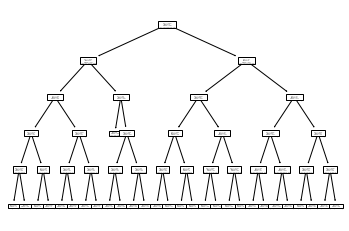

In [74]:
tree=tree.plot_tree(clf.fit(x_train, y_train))

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       513
           1       0.65      0.83      0.73       523
           2       0.81      0.70      0.75       337
           3       0.87      0.69      0.77       627

    accuracy                           0.74      2000
   macro avg       0.76      0.74      0.74      2000
weighted avg       0.76      0.74      0.74      2000



In [76]:
knn_classifier = KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='brute')
knn_classifier.fit(x_train,y_train)
pred_test = knn_classifier.predict(x_test)



C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [77]:
print("Accuracy:", sum(np.diag(con_matrix_gnb_test))/np.sum(con_matrix_gnb_test))
print("Error:", np.round(1-sum(np.diag(con_matrix_gnb_test))/np.sum(con_matrix_gnb_test),2))

Accuracy: 0.448
Error: 0.55


In [78]:
accuracy_score(y_test,pred_test)

0.5155